In [141]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
with open("../data/centralatom-C_numhydrogens-1_numneighbors-3_depth-1/training-validation.pkl", 'rb') as file: # no_descriptor_approach_sorted_and_descriptor.pkl
    data = pickle.load(file)

In [106]:
X, y = data

In [107]:
X = np.asarray(X)
y = np.asarray(y)

In [108]:
X.shape

(63324, 47)

In [109]:
y.shape

(63324, 3)

In [110]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forest regressor
- old: Random Forest R² score: 0.8214503501551021

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
print("Starting training")
rf_model.fit(X_train[:10000], y_train[:10000])
print("Done")

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Compute R² score
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R² score: {r2_rf}')

Starting training
Done
Random Forest R² score: 0.9644756120988189


# Gradient Boosting regressor
- old: Gradient Boosting Multi-Output R² score: 0.8516877707002646

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Compute R² score
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting R² score: {r2_gb}')

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

# Initialize the base model
base_gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Wrap the base model with MultiOutputRegressor
multi_gb_model = MultiOutputRegressor(base_gb_model)

# Train the model
multi_gb_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_gb = multi_gb_model.predict(X_test)

# Compute R² score
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting Multi-Output R² score: {r2_gb}')

Gradient Boosting Multi-Output R² score: 0.9624929920023501


# Support Vector Regressor (SVR)
- <span style="color:red">very slow and does not work well!</span>

In [ ]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Compute R² score
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regressor R² score: {r2_svr}')

In [10]:
from sklearn.svm import SVR

# Initialize the base model
base_svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Wrap the base model with MultiOutputRegressor
multi_svr_model = MultiOutputRegressor(base_svr_model)

# Train the model
multi_svr_model.fit(X_train[:1000], y_train[:1000])

# Predict on the test set
y_pred_svr = multi_svr_model.predict(X_test)

# Compute R² score
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Multi-Output R² score: {r2_svr}')

Support Vector Multi-Output R² score: 0.07626884222848407


# XGBoost Regressor
- old: XGBoost R² score: 0.849968390286696

In [12]:
#!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.1/124.9 MB 585.1 kB/s eta 0:03:34
   ---------------------------------------- 0.3/124.9 MB 1.6 MB/s eta 0:01:16
   ---------------------------------------- 0.8/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 1.9/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.5/124.9 MB 6.7 MB/s eta 0:00:19
   - -------------------------------------- 3.2/124.9 MB 7.4 MB/s eta 0:00:17
   - -------------------------------------- 3.8/124.9 MB 8.0 MB/s eta 0:00:16
   - -------------------------------------- 4.1/124.9 MB 8.2 MB/s eta 0:

In [13]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Compute R² score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost R² score: {r2_xgb}')

XGBoost R² score: 0.9732248224092755


# LightGBM Regressor (cannot install)

In [20]:
#!pip install lightbgm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [ ]:
import lightgbm as lgb

# Initialize the model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgb_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Compute R² score
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM R² score: {r2_lgb}')

# CatBoost Regressor
- seems to be very good (r2 score of 0.860 if only taken 10000 training samples)
- very fast on the whole dataset!
- <span style="color:green">old: 0.877 on the whole dataset!</span>

In [14]:
#!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 435.7 kB/s eta 0:03:53
   ---------------------------------------- 0.1/101.1 MB 1.0 MB/s eta 0:01:39
   ---------------------------------------- 0.4/101.1 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.8/101.1 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 1.3/101.1 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 1.9/101.1 MB 6.5 MB/s eta 0:00:16
   - -------------------------------------- 2.6/101.1 MB 7.4 MB/s eta 0:00:14
   - -------------------------------------- 3.2/101.1 MB 8.0 MB/s eta 0:00:13
   - -------------------------------------- 3.8/101.1 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 4.4/101.1 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 5.0/101.1 MB 9.4 MB/s eta 0:00:1

In [ ]:
from catboost import CatBoostRegressor

# Initialize the model
cat_model = CatBoostRegressor(iterations=100, random_state=42, verbose=0)

# Train the model
cat_model.fit(X_train[:10000], y_train[:10000])

# Predict on the test set
y_pred_cat = cat_model.predict(X_test)

# Compute R² score
r2_cat = r2_score(y_test, y_pred_cat)
print(f'CatBoost R² score: {r2_cat}')

In [193]:
from catboost import CatBoostRegressor

# Initialize the base model
base_cat_model = CatBoostRegressor(iterations=100, random_state=42, verbose=0)

# Wrap the base model with MultiOutputRegressor
multi_cat_model = MultiOutputRegressor(base_cat_model)

# Train the model
multi_cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred_cat = multi_cat_model.predict(X_test)

# Compute R² score
r2_cat = r2_score(y_test, y_pred_cat)
print(f'CatBoost Multi-Output R² score: {r2_cat}')

CatBoost Multi-Output R² score: 0.9714648167092471


In [31]:
# MSE score (Abstand H zu H')
mse_cat = mean_squared_error(y_test, y_pred_cat)
print(f'CatBoost Multi-Output MSE score: {mse_cat}')

CatBoost Multi-Output MSE score: 0.00979558979028246


In [30]:
# Average Cosine Similarity and Average Angle (degrees)
avg_cosine_similarity, avg_angle = metric_cosine_similarity_and_angle(y_test, y_pred_cat)
print("Average Cosine Similarity:", avg_cosine_similarity)
print("Average Angle (degrees):", avg_angle)

Average Cosine Similarity: 0.9895406600347387
Average Angle (degrees): 4.927436128217275


In [87]:
# Durschnittliche Bindungslängendifferenz
avg_bindungslängendifferenz = metric_bindungslänge_differenz(y_test, y_pred_cat)
print("Avg. Bindungslänge Differenz:", avg_bindungslängendifferenz)

Avg. Bindungslänge Differenz: 0.016928202054687702


In [16]:
y_test[:10]

array([[ 0.067, -0.28 ,  1.062],
       [ 0.076, -1.092, -0.109],
       [-0.741, -0.239, -0.777],
       [-0.296,  1.045, -0.176],
       [ 0.194,  0.994, -0.429],
       [ 0.832, -0.371, -0.616],
       [-0.545,  0.953,  0.067],
       [-0.64 , -0.157,  0.88 ],
       [-0.092,  0.803, -0.747],
       [ 0.019,  0.95 ,  0.555]])

In [17]:
y_pred_cat[:10]

array([[ 0.11112838, -0.36389448,  1.17108059],
       [-0.0332124 , -1.08640861, -0.13050196],
       [-0.74923718, -0.28279813, -0.70137582],
       [-0.2231107 ,  1.14609023, -0.08766524],
       [ 0.19242332,  0.95590903, -0.4595724 ],
       [ 0.76699596, -0.3089934 , -0.63879755],
       [-0.46060418,  0.88935751,  0.22508528],
       [-0.5502374 , -0.16443762,  0.9791773 ],
       [-0.07408829,  0.80703848, -0.70768841],
       [ 0.00345849,  0.84724124,  0.50924396]])

# Evaluation scheme

In [88]:
def cosine_similarity_and_angle(vector1, vector2):
    # Convert inputs to numpy arrays if they are not already
    pred = np.array(vector1)
    truth = np.array(vector2)
    
    # Compute the dot product
    dot_product = np.dot(vector1, vector2)
    
    # Compute the norms (magnitudes) of the vectors
    norm_pred = np.linalg.norm(vector1)
    norm_truth = np.linalg.norm(vector2)
    
    # Compute the cosine similarity
    cosine_sim = dot_product / (norm_pred * norm_truth)
    
    # Clip the cosine similarity to the range [-1, 1] to avoid numerical issues
    cosine_sim = np.clip(cosine_sim, -1.0, 1.0)
    
    # Compute the angle in radians
    angle_radians = np.arccos(cosine_sim)
    
    # Convert the angle to degrees
    angle_degrees = np.degrees(angle_radians)

    # Round the values to three decimal places
    cosine_sim = round(cosine_sim, 3)
    angle_radians = round(angle_radians, 3)
    angle_degrees = round(angle_degrees, 3)
    
    return cosine_sim, angle_degrees

In [89]:
# Example usage
predictions = [1, 1, 0] # [3.0, -0.5, 2.0, 7.0]
ground_truth = [0, 1, 1] # [2.5, 0.0, 2.0, 8.0]
similarity, angle_degrees = cosine_similarity_and_angle(predictions, ground_truth)
print("Cosine Similarity:", similarity)
print("Angle (degrees):", angle_degrees)

Cosine Similarity: 0.5
Angle (degrees): 60.0


In [90]:
def metric_cosine_similarity_and_angle(y_test, y_pred):
    assert len(y_test) == len(y_pred), "Length of y_test and y_pred is not the same"
    
    cosine_similarities = []
    angles = []
    for t, p in zip(y_test, y_pred):
        cosine_sim, ang = cosine_similarity_and_angle(t, p)
        cosine_similarities.append(cosine_sim)
        angles.append(ang)
    avg_cosine_similarity = np.average(cosine_similarities)
    avg_angle = np.average(angles)
    return avg_cosine_similarity, avg_angle

In [91]:
# Example usage
predictions = [[1, 1, 0], [1, 0, 0]] # [3.0, -0.5, 2.0, 7.0]
ground_truth = [[0, 1, 1], [0, 0, 1]] # [2.5, 0.0, 2.0, 8.0]
avg_cosine_similarity, avg_angle = metric_cosine_similarity_and_angle(ground_truth, predictions)
print("Cosine Similarity:", avg_cosine_similarity)
print("Angle (degrees):", avg_angle)

Cosine Similarity: 0.25
Angle (degrees): 75.0


In [92]:
def bindungslänge_differenz(truth, pred):
    # truth and pred should have same shape
    np_truth = np.array(truth)
    np_pred = np.array(pred)
    
    return abs(np.linalg.norm(np_truth) - np.linalg.norm(np_pred))

In [93]:
# Example usage
predictions = [1, 1, 0] # [3.0, -0.5, 2.0, 7.0]
ground_truth = [2, 2, 0] # [2.5, 0.0, 2.0, 8.0]
bindugslänge_diff = bindungslänge_differenz(predictions, ground_truth)
print("Bindungslänge Differenz:", bindugslänge_diff)

Bindungslänge Differenz: 1.4142135623730951


In [94]:
def metric_bindungslänge_differenz(y_test, y_pred):
    assert len(y_test) == len(y_pred), "Length of y_test and y_pred is not the same"
        
    return abs(np.average(np.linalg.norm(y_test, axis=1)) - np.average(np.linalg.norm(y_pred, axis=1)))

In [95]:
# Example usage
predictions =[[1, 1, 0], [1, 1, 0]] # [3.0, -0.5, 2.0, 7.0]
ground_truth = [[1, 2, 0], [2, 2, 0]] # [2.5, 0.0, 2.0, 8.0]
bindugslänge_diff = metric_bindungslänge_differenz(predictions, ground_truth)
print("Avg. Bindungslänge Differenz:", bindugslänge_diff)

Avg. Bindungslänge Differenz: 1.1180339887498947


In [166]:
import sys
def all_angles_H_central_neighbor(X_relative_coordinates, y):
    assert len(X_relative_coordinates) == len(y), "Length of X and y is not the same"

    all_angles = []
    for current_X, current_y in zip(X_relative_coordinates, y):
        for coords in current_X:
            _, angle = cosine_similarity_and_angle(coords, current_y)
            all_angles.append(angle)
    return np.array(all_angles)

## Wie ist es im Dataset?

In [167]:
all_angles = all_angles_H_central_neighbor(rel_coordinates, y)

In [168]:
# Laut Theorie müssten es bei H-C-C_3 genau 109,5 Grad sein, also passt
np.average(all_angles)

108.93464949332729

(array([2.63548732e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.63548732e-05,
        2.63548732e-05, 2.63548732e-05, 2.63548732e-05, 0.00000000e+00,
        0.00000000e+00, 2.63548732e-05, 2.63548732e-05, 2.63548732e-05,
        1.05419493e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.90646195e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.63548732e-05, 0.00000000e+00, 0.00000000e+00, 5.27097463e-05,
        5.27097463e-05, 2.63548732e-05, 2.63548732e-05, 2.63548732e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.90646195e-05, 2.63548732e-05, 2.63548732e-05,
        0.00000000e+00, 2.63548732e-05, 2.63548732e-05, 0.000000

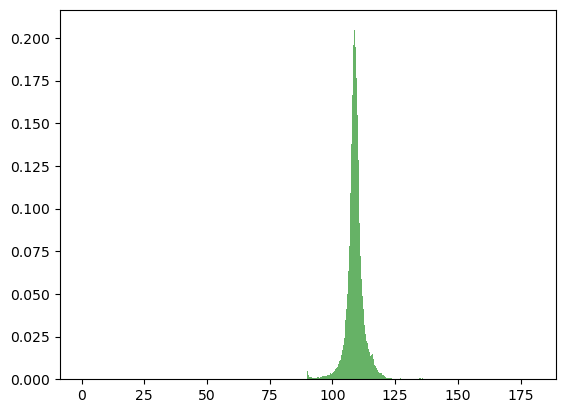

In [159]:
# Create a histogram of the data
plt.hist(all_angles, bins=1000, density=True, alpha=0.6, color='g')

### single gaussian fit

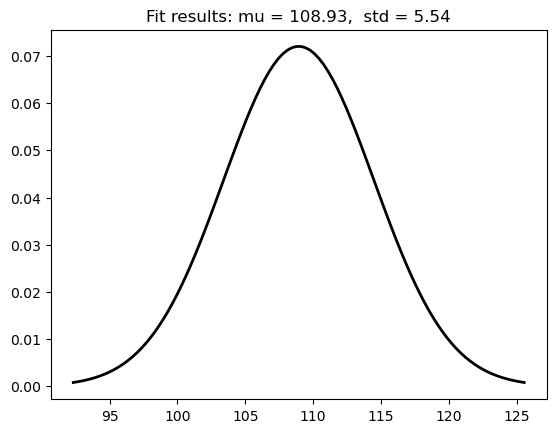

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mu, std = np.mean(all_angles), np.std(all_angles)

# Generate the Gaussian fit over a suitable range
x = np.linspace(mu - 3*std, mu + 3*std, 100)
p = norm.pdf(x, mu, std)

# Plot the Gaussian fit
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

### mixture gaussian fit

In [151]:
all_angles

108.93464949332729

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

def fit_gaussian(data, n_components=1):
    data = data.reshape(-1, 1)  # Reshape for sklearn
    if n_components == 1:
        # Fit a single Gaussian
        mu, std = np.mean(data), np.std(data)
        return mu, std
    else:
        # Fit a Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n_components, random_state=0).fit(data)
        # Extract means and variances
        means = gmm.means_.flatten()
        variances = gmm.covariances_.flatten()
        return gmm, means, variances

def plot_fit(data, n_components=1):
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000).reshape(-1, 1)
    
    if n_components == 1:
        mu, std = fit_gaussian(data, n_components)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        plt.title(f'Single Gaussian Fit: mu = {mu:.2f}, std = {std:.2f}')
    else:
        gmm, means, variances = fit_gaussian(data, n_components)
        logprob = gmm.score_samples(x)
        pdf = np.exp(logprob)
        plt.plot(x, pdf, 'k', linewidth=2)
        plt.title(f'Gaussian Mixture Model with {n_components} components')
        for mean, var in zip(means, variances):
            std = np.sqrt(var)
            p = norm.pdf(x, mean, std)
            plt.plot(x, p, '--', linewidth=2)
            plt.text(mean, norm.pdf(mean, mean, std), f'mu={mean:.2f}, std={std:.2f}', 
                     horizontalalignment='center')

    plt.show()

C:\Users\Hasan\anaconda3\envs\hydrogen\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


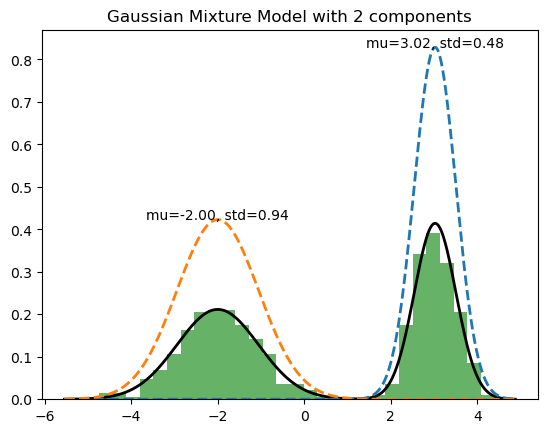

In [171]:
# Sample data
data = np.concatenate([np.random.normal(-2, 1, 300), np.random.normal(3, 0.5, 300)])
plot_fit(data, n_components=2)

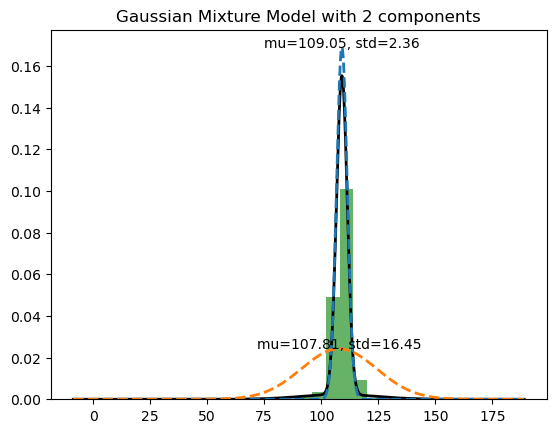

In [172]:
plot_fit(all_angles, n_components=2)

## Wie ist die Prediction?

In [209]:
with open("../data/centralatom-C_numhydrogens-1_numneighbors-3_depth-1/dataset.pkl", 'rb') as file: # no_descriptor_approach_sorted_and_descriptor.pkl
    data = pickle.load(file)

In [210]:
X, y, rel_coordinates = data

In [211]:
X_train, X_test, y_train, y_test, rel_coordinates_train, rel_coordinates_test = train_test_split(
    X, y, rel_coordinates, test_size=0.2, random_state=42
)

In [212]:
X_train, X_test, y_train, y_test, rel_coordinates_train, rel_coordinates_test = train_test_split(
    X_train, y_train, rel_coordinates_train, test_size=0.2, random_state=42
)

In [196]:
all_angles_pred = all_angles_H_central_neighbor(rel_coordinates_test, y_pred_cat)

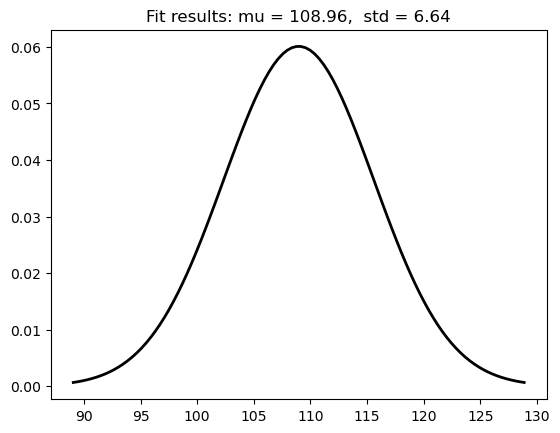

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate mean and standard deviation
mu, std = np.mean(all_angles_pred), np.std(all_angles_pred)

# Generate the Gaussian fit over a suitable range
x = np.linspace(mu - 3*std, mu + 3*std, 100)
p = norm.pdf(x, mu, std)

# Plot the Gaussian fit
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

- Prediction ist gut, da ähnlicher Mean value (sogar näher am theoretisch richtigen Winkel von 109,5)
- Prediction ist andererseits bisschen schlecht, da stärkere Varianz als im Training

### wasserstein distance
- das ist gutes Ergebnis, weil im Schnitt muss man also den Winkel nur um 1 Grad verschieben für richtige Prediction

In [244]:
from scipy.stats import wasserstein_distance

# Wasserstein Distanz zwischen zwei Winkelverteilungen
wasserstein_distance(all_angles, all_angles_pred)

1.0496652018175632

## Dihedral Winkel

In [232]:
import itertools

def compute_dihedral(p0, p1, p2, p3):
    """Calculate the dihedral angle between four points."""
    # Cast inputs to numpy arrays
    p0 = np.asarray(p0)
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    p3 = np.asarray(p3)
    
    b0 = -1.0 * (p1 - p0)
    b1 = p2 - p1
    b2 = p3 - p2

    b0xb1 = np.cross(b0, b1)
    b1xb2 = np.cross(b1, b2)

    b0xb1_x_b1xb2 = np.cross(b0xb1, b1xb2)

    y = np.dot(b0xb1_x_b1xb2, b1) * (1.0 / np.linalg.norm(b1))
    x = np.dot(b0xb1, b1xb2)

    return abs(np.degrees(np.arctan2(y, x)))

def all_dihedral_angles(coordinates):
    """Compute all possible dihedral angles for a list of coordinates."""
    num_atoms = len(coordinates)
    angles = []
    for fixed_pair in itertools.combinations(range(num_atoms), 2):
        remaining_indices = set(range(num_atoms)) - set(fixed_pair)
        for p2, p3 in itertools.permutations(remaining_indices, 2):
            p0, p1 = fixed_pair
            angle = compute_dihedral(coordinates[p0], coordinates[p1], coordinates[p2], coordinates[p3])
            angles.append(((p0, p1, p2, p3), angle))
    return angles

In [233]:
# merge x and y coordinates
all_coordinates = []
for cur_x, cur_y in zip(rel_coordinates, y):
    all_coordinates.append(cur_x + [cur_y] + [[0,0,0]]) # [0,0,0] central atom relative coordinates

### first two points are the fixed points, Ebene 1 sind Punkte 1,2,3, Ebene 2 sind die Punkte 1,2,4

In [236]:
dihedral_angles = all_dihedral_angles(all_coordinates[0])
for angle_info in dihedral_angles:
    indices, angle = angle_info
    print(f"Dihedral Angle between points {indices}: {angle:.2f} degrees")

Dihedral Angle between points (0, 1, 2, 3): 114.99 degrees
Dihedral Angle between points (0, 1, 2, 4): 146.39 degrees
Dihedral Angle between points (0, 1, 3, 2): 102.68 degrees
Dihedral Angle between points (0, 1, 3, 4): 141.09 degrees
Dihedral Angle between points (0, 1, 4, 2): 56.76 degrees
Dihedral Angle between points (0, 1, 4, 3): 61.85 degrees
Dihedral Angle between points (0, 2, 1, 3): 114.99 degrees
Dihedral Angle between points (0, 2, 1, 4): 146.39 degrees
Dihedral Angle between points (0, 2, 3, 1): 104.46 degrees
Dihedral Angle between points (0, 2, 3, 4): 142.02 degrees
Dihedral Angle between points (0, 2, 4, 1): 58.04 degrees
Dihedral Angle between points (0, 2, 4, 3): 61.99 degrees
Dihedral Angle between points (0, 3, 1, 2): 102.68 degrees
Dihedral Angle between points (0, 3, 1, 4): 141.09 degrees
Dihedral Angle between points (0, 3, 2, 1): 104.46 degrees
Dihedral Angle between points (0, 3, 2, 4): 142.02 degrees
Dihedral Angle between points (0, 3, 4, 1): 60.27 degrees
Di

In [243]:
from tqdm import tqdm

dihedral_angles = [all_dihedral_angles(coords)[-1] for coords in tqdm(all_coordinates)]

100%|██████████████████████████████████████| 70361/70361 [05:44<00:00, 203.98it/s]


In [245]:
dihedral_angles[:5]

[((3, 4, 2, 1), 59.97111107613615),
 ((3, 4, 2, 1), 61.7437081163752),
 ((3, 4, 2, 1), 62.51778640599473),
 ((3, 4, 2, 1), 60.534318429807286),
 ((3, 4, 2, 1), 60.71164229572551)]

# Methods from evaluation.py can be used as follows:

In [1]:
# imports all methods from evaluation.py
from evaluation import *

In [4]:
np.random.seed(42)
mean = 0
std_dev = 1

# Beispieldaten mit Shape (10, 3, 3) im Wertebereich [0, 1]
X_relative_coordinates = np.random.normal(loc=mean, scale=std_dev, size= (10, 5, 3))  # z.b. 10 Samples mit je 5 Nachbaratome mit x, y, z Werten

# Beispieldaten mit Shape (10, 3) im Wertebereich [0, 1]
y_test = np.random.normal(loc=mean, scale=std_dev, size=(10, 3))  # z.b. ground truth 10 Hydrogen positions mit x, y, z Werten
y_pred = np.random.normal(loc=mean, scale=std_dev, size=(10, 3))  # z.b. predicted 10 Hydrogen positions mit x, y, z Werten

# absoluter Abstand H zu H' (MSE Score)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE score: {mse}')

# Durchschnittliche Cosine Similarity (kann ignoriert werden) und durchschnittliche Winkel
avg_cosine_similarity, avg_angle = metric_cosine_similarity_and_angle(y_test, y_pred)
print("Average Cosine Similarity:", avg_cosine_similarity)
print("Average Angle (degrees):", avg_angle)

# Duchschnittliche Bindungslängendifferenz
avg_bindugslänge_diff = metric_bindungslänge_differenz(y_test, y_pred)
print("Durschnittliche Bindungslänge Differenz:", avg_bindugslänge_diff)

# Wasserstein Distanz zwischen zwei Winkelverteilungen
all_angles_test = all_angles_H_central_neighbor(X_relative_coordinates, y_test)  # alle Winkel im Test set
all_angles_pred = all_angles_H_central_neighbor(X_relative_coordinates, y_pred)  # alle Winkel durch Prediction
wasserstein = wasserstein_distance(all_angles_test , all_angles_pred)
print("Die Wasserstein Distanz zwischen den beiden Winkelverteilungen beträgt: ", wasserstein)

MSE score: 1.1179945157374767
Average Cosine Similarity: 0.1652
Average Angle (degrees): 78.63820000000001
Durschnittliche Bindungslänge Differenz: 0.07368851874514193
Die Wasserstein Distanz zwischen den beiden Winkelverteilungen beträgt:  9.261439999999999


# Other potential models
- Gaussian Process Regression
- RANSAC